# What is Native Title?
Native Title is not about deciding “this land is yours and that land is mine. Native Title is a legal process that recognises the pre-existing rights of Aboriginal and Torres Strait Islander peoples to land and waters.

# Current Work-in-Progress Overview (Applications)
***Date Extracted: 14-01-2026***

- Schedule of Native Title Determination Applications <br>
https://digital.atlas.gov.au/datasets/digitalatlas::schedule-of-native-title-determination-applications/about

## Download CSV Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
applications = pd.read_csv(r"NNTT_Custodial_AGOL_4131931795035003256.csv")
future_act_notice = pd.read_csv(r"NNTT_Custodial_AGOL_6557704538249392094.csv")

# 1. Schedule of Native Title Determination Applications

**This section counts native title determination-related applications currently in the system, broken into types (claimant, non-claimant, compensation, revised determination).**

## Data Exploration

In [3]:
applications.shape

(191, 21)

In [4]:
applications.dtypes

OBJECTID               int64
Tribunal No           object
Name                  object
Fed Court No          object
Lodged                object
Status                object
Reg Test Status       object
Reg Test Decision     object
Date Registered       object
Combined              object
Representative        object
Type                  object
Area sq km           float64
Date_Currency         object
Sea Claim             object
NNTT_Seq_No           object
Jurisdiction          object
Overlap               object
Date_extracted        object
Shape__Area          float64
Shape__Length        float64
dtype: object

In [5]:
applications.isna().sum()

OBJECTID               0
Tribunal No            0
Name                   0
Fed Court No           0
Lodged                 0
Status                 0
Reg Test Status        0
Reg Test Decision     69
Date Registered       94
Combined               0
Representative         4
Type                   0
Area sq km             0
Date_Currency          0
Sea Claim              0
NNTT_Seq_No            0
Jurisdiction           0
Overlap              183
Date_extracted         0
Shape__Area            0
Shape__Length          0
dtype: int64

In [6]:
applications["Overlap"].value_counts()

Overlap
NSW        3
           2
QLD        1
SA         1
NSW, SA    1
Name: count, dtype: int64

In [7]:
applications["Type"].value_counts()

Type
Claimant                              131
Non-Claimant                           52
Compensation                            6
Revised Native Title Determination      2
Name: count, dtype: int64

In [9]:
applications["Reg Test Status"].value_counts()

Reg Test Status
Accepted for registration                                                            96
Not currently identified for Reg. Decision                                           61
Not Accepted for registration                                                        21
Currently identified for Reg. Decision (new decision in progress - s 190A)            9
Accepted for registration (new decision in progress - s 190A)                         2
Not Accepted for registration (new decision in progress - s 190A)                     1
Not Accepted for registration (new decision in progress - s 190E reconsideration)     1
Name: count, dtype: int64

## Data Analysis

### Application Status

In [56]:
applications['Status'].value_counts()

Status
Active                         190
Full Approved Determination      1
Name: count, dtype: int64

**✅ 190 cases are in progress of application.** </b>

✅ NNTT warns that “current applications” may still include matters where a determination has been made, but the court orders say it won’t become effective yet until conditions are met. So **“current applications” ≠ “no court outcome yet”** in every case.

In [25]:
applications["Reg Test Status"].value_counts()

Reg Test Status
Accepted for registration                                                            96
Not currently identified for Reg. Decision                                           61
Not Accepted for registration                                                        21
Currently identified for Reg. Decision (new decision in progress - s 190A)            9
Accepted for registration (new decision in progress - s 190A)                         2
Not Accepted for registration (new decision in progress - s 190A)                     1
Not Accepted for registration (new decision in progress - s 190E reconsideration)     1
Name: count, dtype: int64

**✅ 96 cases are accepted for registration.**
- Registered (Accepted) : 96
- Not Registered (Not accepted) : 21
- Pending / Under decision (decision in progress / not currently identified) : 74

### Application Stages

In [177]:
stage = applications[['Lodged', 'Reg Test Decision', 'Date Registered']].isna().mean()*100
stage

Lodged                0.000000
Reg Test Decision    36.125654
Date Registered      49.214660
dtype: float64

In [191]:
# convert to reached %
stage_reached = 100 - stage

stage_df = (
    stage_reached
    .rename_axis("Stage")
    .reset_index(name="Reached (%)")
)

stage_df["Stage"] = pd.Categorical(
    stage_df["Stage"],
    categories=["Lodged", "Reg Test Decision", "Date Registered"],
    ordered=True
)
stage_df = stage_df.sort_values("Stage").reset_index(drop=True)

stage_df

,Stage,Reached (%)
0,Lodged,100.000000
1,Reg Test Decision,63.874346
2,Date Registered,50.785340


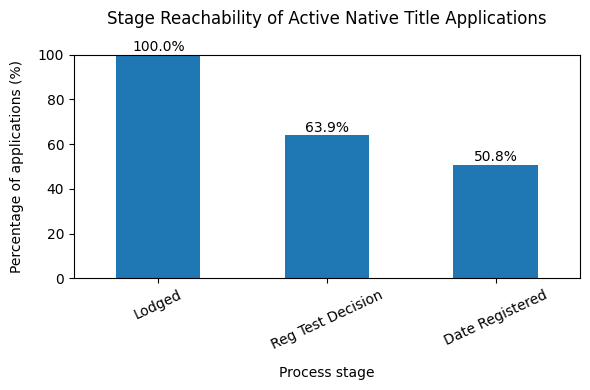

In [192]:
import matplotlib.pyplot as plt

ax = stage_df.set_index("Stage")["Reached (%)"].plot(
    kind="bar",
    figsize=(6,4),
    ylim=(0, 100)
)

ax.set_title(
    "Stage Reachability of Active Native Title Applications",
    pad=22
)

ax.set_xlabel("Process stage", labelpad=10)
ax.set_ylabel("Percentage of applications (%)", labelpad=10)

plt.xticks(rotation=25)

for i, v in enumerate(stage_df["Reached (%)"]):
    ax.text(i, v + 1.5, f"{v:.1f}%", ha="center")

plt.tight_layout()
plt.show()


**✅ Approximately 36% of active applications do not yet have a recorded registration test decision date, and around 49% have not reached the formal registration stage.**

In [84]:
applications.loc[applications['Date Registered'].isna()]['Reg Test Status'].value_counts()

Reg Test Status
Not currently identified for Reg. Decision                                           61
Not Accepted for registration                                                        21
Currently identified for Reg. Decision (new decision in progress - s 190A)            9
Accepted for registration                                                             1
Not Accepted for registration (new decision in progress - s 190A)                     1
Not Accepted for registration (new decision in progress - s 190E reconsideration)     1
Name: count, dtype: int64

In [85]:
applications.loc[
    (applications['Date Registered'].isna()) & 
    (applications['Reg Test Status'] == 'Accepted for registration')
]

,OBJECTID,Tribunal No,Name,Fed Court No,Lodged,Status,Reg Test Status,Reg Test Decision,Date Registered,Combined,...,Type,Area sq km,Date_Currency,Sea Claim,NNTT_Seq_No,Jurisdiction,Overlap,Date_extracted,Shape__Area,Shape__Length
21,66,QC2017/006,Gamilaraay People,QUD290/2017,6/12/2017 12:00:00 AM,Full Approved Determination,Accepted for registration,11/20/2017 12:00:00 AM,NaN,N,...,Claimant,5403.0807,3/12/2019 12:00:00 AM,N,QC2017/006,QLD,NaN,12/22/2025 12:00:00 AM,7.040294e+09,522513.944751


**✅ Tribunal No QC2017/006 doesn't have Date Registered. The record has Status = “Full Approved Determination”. That strongly suggests the matter has progressed to an outcome stage (i.e., it’s not an “active registered claim” anymore).**

In [91]:
#datetime
date_cols = [
    "Lodged",
    "Reg Test Decision",
    "Date Registered",
    "Date_Currency",
    "Date_extracted"
]

for col in date_cols:
    applications[col] = pd.to_datetime(applications[col], errors="coerce")

C:\Users\sosop\AppData\Local\Temp\ipykernel_24776\1445292310.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  applications[col] = pd.to_datetime(applications[col], errors="coerce")
C:\Users\sosop\AppData\Local\Temp\ipykernel_24776\1445292310.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  applications[col] = pd.to_datetime(applications[col], errors="coerce")
C:\Users\sosop\AppData\Local\Temp\ipykernel_24776\1445292310.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  applications[col] = pd.to_datetime(applications[col], errors="coerce")
C:\Users\sosop\AppData\Lo

- Lodged: The date the application was first submitted to the system.
- Reg Test Decision: The date the application passed or failed the registration test.
- Date Registered: The date the application was formally entered onto the Register.
- Date_Currency: The date the record was last considered current by the system.
- Date_extracted: The date the data was pulled out of the system and exported.

In [92]:
today = pd.Timestamp.today().normalize()

applications = applications.copy()
applications["Processing Days"] = (today - applications["Lodged"]).dt.days

In [93]:
applications["Processing Days"].describe()

count     191.000000
mean     1818.130890
std      2028.827307
min        26.000000
25%       306.500000
50%      1175.000000
75%      2638.500000
max      9610.000000
Name: Processing Days, dtype: float64

In [94]:
bins = [0, 365, 3*365, 5*365, 10*365, 50*365]
labels = ["<1 year", "1–3 years", "3–5 years", "5–10 years", "10+ years"]

applications["Processing Days Bucket"] = pd.cut(
    applications["Processing Days"],
    bins=bins,
    labels=labels,
    right=False
)

In [95]:
applications["Processing Days Bucket"].value_counts().sort_index()

Processing Days Bucket
<1 year       51
1–3 years     41
3–5 years     29
5–10 years    46
10+ years     24
Name: count, dtype: int64

**✅ The Native Title system is managing a mixed pipeline, where cases of vastly different ages and stages coexist under a single “active” status.**

In [123]:
# Define furthest stage reached
applications["stage_reached"] = np.select(
    [
        applications["Date Registered"].notna(),
        applications["Reg Test Decision"].notna()
    ],
    [
        "Registered",
        "Reg Test Decision"
    ],
    default="Lodged only"
)

In [124]:
applications["stage_reached"]

0       Registered
1       Registered
2       Registered
3       Registered
4       Registered
          ...     
186    Lodged only
187    Lodged only
188    Lodged only
189    Lodged only
190     Registered
Name: stage_reached, Length: 191, dtype: object

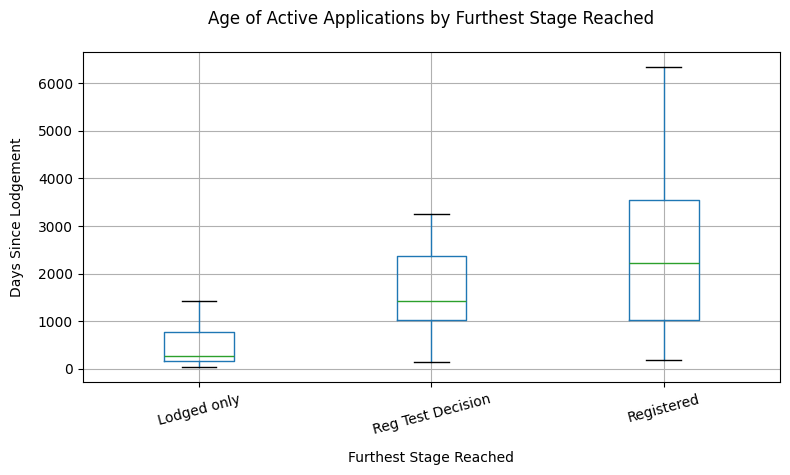

In [126]:
stages = ["Lodged only", "Reg Test Decision", "Registered"]


applications["stage_reached"] = pd.Categorical(
    applications["stage_reached"],
    categories = stages,
    ordered = True
)

# Plot boxplot
ax = applications.boxplot(
    column = "Processing Days",
    by = "stage_reached",
    figsize = (8,5),
    showfliers=False
)
plt.title("Age of Active Applications by Furthest Stage Reached", pad=20)
plt.suptitle("") 
plt.xlabel("Furthest Stage Reached", labelpad=10)
plt.ylabel("Days Since Lodgement", labelpad=10)
plt.xticks(rotation=15)
plt.tight_layout()

plt.show()

**✅ Although later-stage applications are older on average, the wide overlap in age across stages shows that time alone does not explain progression through the Native Title process.**

### Processing Time

In [127]:
applications["Jurisdiction"].value_counts()

Jurisdiction
QLD    72
NT     39
NSW    38
WA     26
VIC    10
SA      6
Name: count, dtype: int64

In [128]:
# applications["Jurisdiction"] = applications["Jurisdiction"].fillna("Missing").astype(str).str.strip()
# applications["Overlap"] = applications["Overlap"].replace("", np.nan)

# overlap = complexity
applications["complexity_flag"] = np.where(
    applications["Overlap"].notna(),
    "Overlapping",
    "Not recorded"
)

In [129]:
applications["complexity_flag"]

0      Not recorded
1      Not recorded
2       Overlapping
3       Overlapping
4      Not recorded
           ...     
186    Not recorded
187    Not recorded
188     Overlapping
189     Overlapping
190    Not recorded
Name: complexity_flag, Length: 191, dtype: object

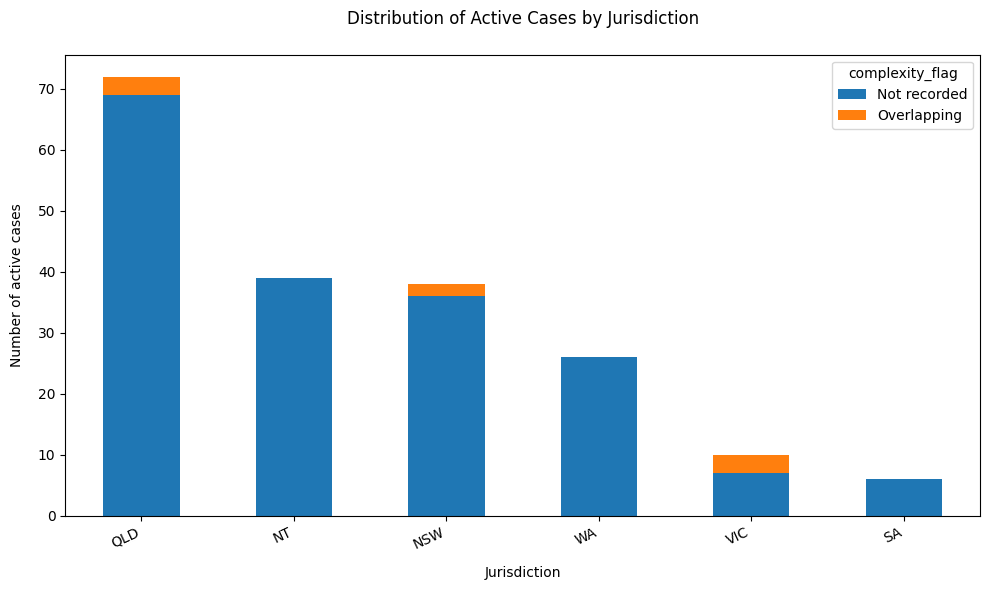

In [130]:
pivot = pd.crosstab(applications["Jurisdiction"], applications["complexity_flag"])
pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).index]

ax = pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6)
)

ax.set_title(
    "Distribution of Active Cases by Jurisdiction",
    pad=22
)

ax.set_xlabel("Jurisdiction", labelpad=10)
ax.set_ylabel("Number of active cases", labelpad=10)

# for container in ax.containers:
#     ax.bar_label(
#         container,
#         label_type="center",
#         fontsize=12
#     )

plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()


**✅ Active Native Title cases are unevenly distributed across Australian jurisdictions, with a large share concentrated in Queensland, New South Wales, and the Northern Territory.**

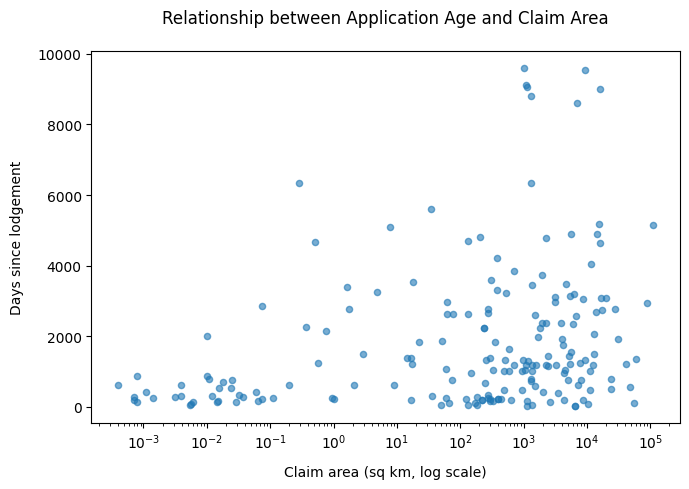

In [131]:
ax = applications.plot(
    kind="scatter",
    x="Area sq km",
    y="Processing Days",
    figsize=(7,5),
    alpha=0.6
)

ax.set_xscale("log")
ax.set_title("Relationship between Application Age and Claim Area", pad=20)
ax.set_xlabel("Claim area (sq km, log scale)", labelpad=10)
ax.set_ylabel("Days since lodgement", labelpad=10)

plt.tight_layout()
plt.show()

**✅ There is no strong, clear relationship between claim area and application age. Ages are spread widely across all sizes. But the largest area claims include more of the very old outliers, suggesting some big claims can remain unresolved for a long time.**

### Sea Claim

In [133]:
applications["Sea Claim"].value_counts()

Sea Claim
N    156
Y     35
Name: count, dtype: int64

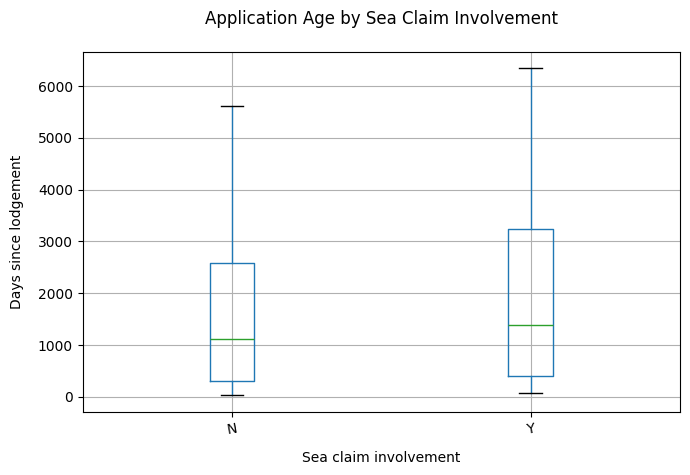

In [134]:
ax = applications.boxplot(
    column="Processing Days",
    by="Sea Claim",
    figsize=(7,5),
    showfliers=False
)

plt.title("Application Age by Sea Claim Involvement", pad=20)
plt.suptitle("")
plt.xlabel("Sea claim involvement", labelpad=10)
plt.ylabel("Days since lodgement", labelpad=10)
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

In [132]:
applications.groupby("Sea Claim")["Processing Days"].describe()

,count,mean,std,min,25%,50%,75%,max
Sea Claim,,,,,,,,
N,156.0,1736.647436,2003.006478,26.0,301.0,1108.5,2586.5,9610.0
Y,35.0,2181.314286,2132.030802,76.0,403.5,1392.0,3238.5,8818.0


**✅ Applications with sea claims (Y) tend to be older on average and show a wider spread, meaning sea-claim matters are generally more variable and often take longer than non-sea-claim (N) matters.**

### Active Application Areas on Australia Map

C:\Users\sosop\miniconda3\envs\projects\lib\site-packages\pyogrio\raw.py:200: RuntimeWarning: NNTT_Custodial_AGOL_-354155767845826874/Schedule_of_Native_Title_Determination_Applications.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


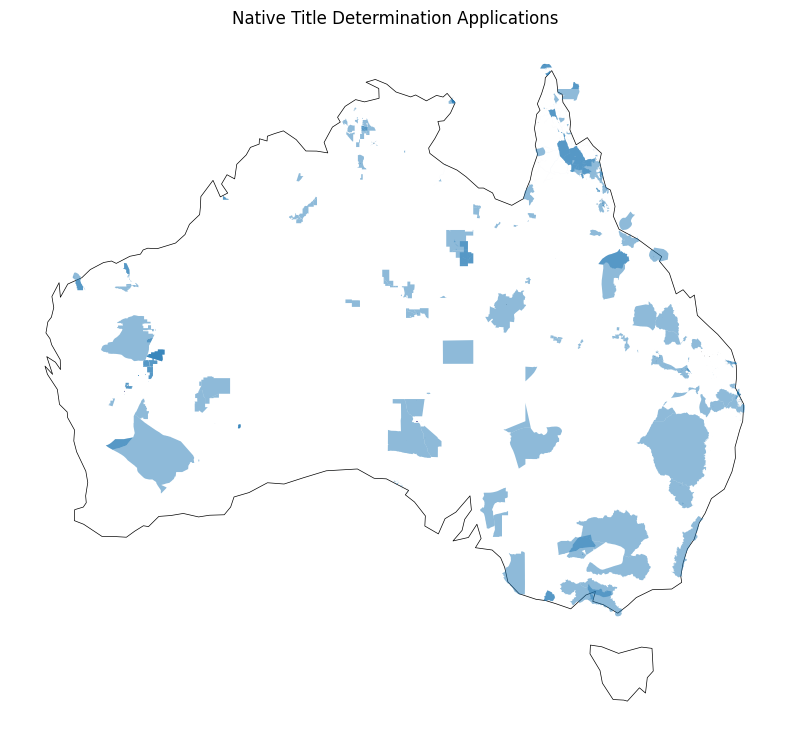

In [172]:
# NNTT_Custodial_AGOL_-354155767845826874/Schedule_of_Native_Title_Determination_Applications.shp

import geopandas as gpd
import matplotlib.pyplot as plt

# 1) your shapefile
gdf = gpd.read_file(
    "NNTT_Custodial_AGOL_-354155767845826874/Schedule_of_Native_Title_Determination_Applications.shp"
).to_crs(epsg=4326)

# 2) Australia outline
world_url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(world_url).to_crs(epsg=4326)

# Natural Earth attribute columns can differ; ADMIN is commonly used for country name
aus = world[world["ADMIN"] == "Australia"]

# 3) overlay plot
fig, ax = plt.subplots(figsize=(8, 8))
aus.plot(ax=ax, facecolor="white", edgecolor="black", linewidth=0.5)
gdf.plot(ax=ax, alpha=0.5) #alpha=opacity

# # (Option) Near QLD
# ax.set_xlim(138, 154)
# ax.set_ylim(-29, -9)

ax.set_title("Native Title Determination Applications")
ax.set_axis_off()
plt.tight_layout()
plt.show()
